In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Initializations
NX = 15
NY = 10
omega = 1.0
weights_i = [4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36]
prob_density_ijk = np.einsum('ijk, i -> ijk', np.ones([9,NY,NX]), weights_i)
# Velocity vector for different positions
c_ij = np.array([[0, 1, 0, -1, 0, 1, -1, -1, 1],
                 [0, 0, 1, 0, -1, 1, 1, -1, -1]])

# Function to calculate density
def calc_density(f):
    return np.einsum('ijk->jk', f)
    
# Function to calculate the velocity field at each grid point
def calc_vel_field(f):
    rho = calc_density(f)
    return np.einsum('ji, ikl -> jkl', c_ij, f)/rho

# Streaming function
def streaming(f):
    for i in range(0,9):
        f[i] = np.roll(f[i,:,:], shift=c_ij.T[i], axis=(0,1))
    return f

In [11]:
# Calculating the density and velocity
rho_ij = calc_density(prob_density_ijk)
u_ijk = calc_vel_field(prob_density_ijk)

# Changing velocities at the 1st and 4th channels.
prob_density_ijk[1,0,:] = prob_density_ijk[1,0,:] + 0.01
prob_density_ijk[4,0,:] = prob_density_ijk[4,0,:] - 0.01

In [12]:
def vel_field_plot(vel_field):
    Y, X = np.mgrid[0:NY,0:NX]
    plt.streamplot(X, Y, vel_field[0], vel_field[1], density=1)
    plt.title('Stream plot of the velocity field')
    plt.grid()
    plt.show()
    
def density_plot(density):
    fig, ax = plt.subplots()
    X = np.arange(density.shape[1])
    Y = np.arange(density.shape[0])
    denseplot = ax.pcolormesh(X, Y, density, shading='auto')
    fig.colorbar(denseplot)
    ax.set_title('Density across all grid points')

In [13]:
# Call the streaming function in a loop to see how the probability density changes after each loop
# Recalculate the density and velocity at the end (plot them)
for i in range(0,3):
    streaming(prob_density_ijk)

rho_ij = calc_density(prob_density_ijk)
u_ijk = calc_vel_field(prob_density_ijk)

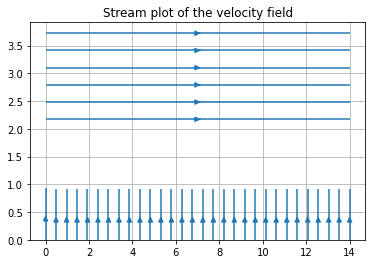

In [14]:
vel_field_plot(u_ijk)

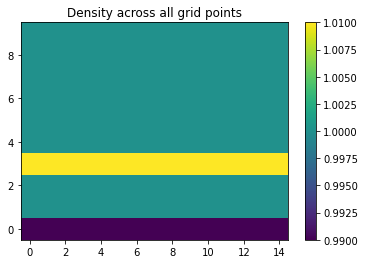

In [15]:
density_plot(rho_ij)